## 1. Project Background/Motivation
- Global warming can be defined as the ongoing rise in temperature on the Earth surface as a direct result of increase CO2 emissions largely from human activity. Studies show that this rise in Earth’s temperature has led to a record number of extreme weather events, precipitation changes, and abnormal weather conditions across the globe. 

- The effects of global warming mentioned above have a direct impact on the growing seasons of the commodities we depend on for food supply, for example, wheat, corn, and sugar cane. When these comedies are impacted, so are the products that are made with them. This in turn can lead to an effect on the stock market if companies cannot make the appropriate amounts of product for distribution. 

- I work for MK Consulting, a consulting group that works with large companies to advise on what entities to acquire to expand their market. We are currently working with Anheuser-Busch, the largest brewing company in the United States. They currently operate 12 breweries in the United States and nearly 20 in other countries Their brands include: Budweiser, Busch, Michelob, Bud Light, and Natural Light.

- Anheuser-Busch is looking to acquire another food entity to expand their portfolio into something other than beverages. They currently have a list of companies that they are considering and are looking to MK Consulting for help in determining which company to buy. Since the CEO is familiar with the struggles of purchasing wheat due to in unseasonable weather, they would like to purchase a company that has fared well during intense fluctuations seen as a result of global warming.




Data:
    a)Climate Factors: Temperature, Precipitation 
        - Daily national averages from 2012 to 2019 
        - Source: https://www.ncdc.noaa.gov/cag/national/time-series/110/pcp/all/3/2010-2019?base_prd=true&begbaseyear=1901&endbaseyear=2000
        
    b)Food commodity stock: WEAT, CANE, CORN
        - Open Price, High Price of the day, Low Price of the day, Close Price, Volume
        Source: Yahoo Finance
    c)Company stock: 
        - Open Price, High Price of the day, Low Price of the day, Close Price, Volume
        a)HSY: Hershey Co
        b)SJM: Smucker Co
        c)GIS: General Mills Inc
        d)PEP: Pepsi Co
        e)CPB: Campbell Soup Co
        Source: Yahoo Finance


## 2. Problem Statement/Statement of Work
    Main Question: Which company should Anheuser-Busch purchase to add to its portfolio?

    Sub questions:
        a)Are WEAT, CANE, and CORN stock correlated to climate factors?
        b)Are WEAT, CANE, and CORN stock correlated to company stock?
        c)Is company stock correlated to climate conditions? 
        d)Do highs and lows of stock prices correlate to highs and lows of climate data?

    How these steps will be accomplished: 
        a)Initial EDA in Python
        b)Correlation in Python
        c)Initial patterns in Python
        d)Create more advanced models in Tableau
        e)Form conclusions 

## 3. Preliminary Results/Exploratory Data Analysis

In [2]:
# Imported packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [3]:
# Load in data
data_load = pd.read_csv('Capstone_Data.csv')
data = data_load.drop(['Date'], axis=1)
data.head(5)

,Month,Year,Avg_Temp_F,Temp_StDev,Avg_Precip_In,Precip_StDev,CORN_Open,CORN_High,CORN_Low,CORN_Close,...,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Volume,CPB_Open,CPB_High,CPB_Low,CPB_Close,CPB_Volume
0,January,2012,36.12,6.0,2.09,-0.22,42.73,42.99,42.18,42.62,...,66.86,67.19,66.36,66.40,"5,348,800",33.50,33.69,32.93,32.98,"1,854,500"
1,January,2012,36.12,6.0,2.09,-0.22,42.79,42.95,42.20,42.51,...,66.41,66.84,66.12,66.74,"6,042,400",33.00,33.18,32.66,32.73,"1,721,200"
2,January,2012,36.12,6.0,2.09,-0.22,42.25,42.25,41.35,41.51,...,66.58,66.67,66.12,66.22,"4,909,100",32.69,32.73,31.80,31.81,"4,621,400"
3,January,2012,36.12,6.0,2.09,-0.22,41.72,41.80,41.26,41.35,...,66.27,66.27,65.29,65.39,"6,533,000",31.75,31.83,31.22,31.45,"4,981,500"
4,January,2012,36.12,6.0,2.09,-0.22,42.05,42.52,41.87,42.19,...,65.26,65.83,65.01,65.73,"5,859,600",31.53,31.91,31.50,31.83,"1,759,800"


In [4]:
#46 rows(features)
#2012 columns
data.shape

(2012, 46)

In [5]:
#Name of all features in dataset
#2 categorical
#44 numerical 
data.columns

Index(['Month', 'Year', 'Avg_Temp_F', 'Temp_StDev', 'Avg_Precip_In',
       'Precip_StDev', 'CORN_Open', 'CORN_High', 'CORN_Low', 'CORN_Close',
       'CORN_Volume', 'WEAT_Open', 'WEAT_High', 'WEAT_Low', 'WEAT_Close',
       'WEAT_Volume', 'CANE_Open', 'CANE_High', 'CANE_Low', 'CANE_Close',
       'CANE_Volume', 'HSY_Open', 'HSY_High', 'HSY_Low', 'HSY_Close',
       'HSY_Volume', 'SJM_Open', 'SJM_High', 'SJM_Low', 'SJM_Close',
       'SJM_Volume', 'GIS_Open', 'GIS_High', 'GIS_Low', 'GIS_Close',
       'GIS_Volume', 'PEP_Open', 'PEP_High', 'PEP_Low', 'PEP_Close',
       'PEP_Volume', 'CPB_Open', 'CPB_High', 'CPB_Low', 'CPB_Close',
       'CPB_Volume'],
      dtype='object')

In [6]:
#need to convert object to numeric
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 46 columns):
Month            2012 non-null object
Year             2012 non-null int64
Avg_Temp_F       2012 non-null float64
Temp_StDev       2012 non-null float64
Avg_Precip_In    2012 non-null float64
Precip_StDev     2012 non-null float64
CORN_Open        2012 non-null float64
CORN_High        2012 non-null float64
CORN_Low         2012 non-null float64
CORN_Close       2012 non-null float64
CORN_Volume      2012 non-null object
WEAT_Open        2012 non-null float64
WEAT_High        2012 non-null float64
WEAT_Low         2012 non-null float64
WEAT_Close       2012 non-null float64
WEAT_Volume      2012 non-null object
CANE_Open        2012 non-null float64
CANE_High        2012 non-null float64
CANE_Low         2012 non-null float64
CANE_Close       2012 non-null float64
CANE_Volume      2012 non-null object
HSY_Open         2012 non-null float64
HSY_High         2012 non-null float64
HS

In [7]:
#no null values
data.isnull().sum()

Month            0
Year             0
Avg_Temp_F       0
Temp_StDev       0
Avg_Precip_In    0
Precip_StDev     0
CORN_Open        0
CORN_High        0
CORN_Low         0
CORN_Close       0
CORN_Volume      0
WEAT_Open        0
WEAT_High        0
WEAT_Low         0
WEAT_Close       0
WEAT_Volume      0
CANE_Open        0
CANE_High        0
CANE_Low         0
CANE_Close       0
CANE_Volume      0
HSY_Open         0
HSY_High         0
HSY_Low          0
HSY_Close        0
HSY_Volume       0
SJM_Open         0
SJM_High         0
SJM_Low          0
SJM_Close        0
SJM_Volume       0
GIS_Open         0
GIS_High         0
GIS_Low          0
GIS_Close        0
GIS_Volume       0
PEP_Open         0
PEP_High         0
PEP_Low          0
PEP_Close        0
PEP_Volume       0
CPB_Open         0
CPB_High         0
CPB_Low          0
CPB_Close        0
CPB_Volume       0
dtype: int64

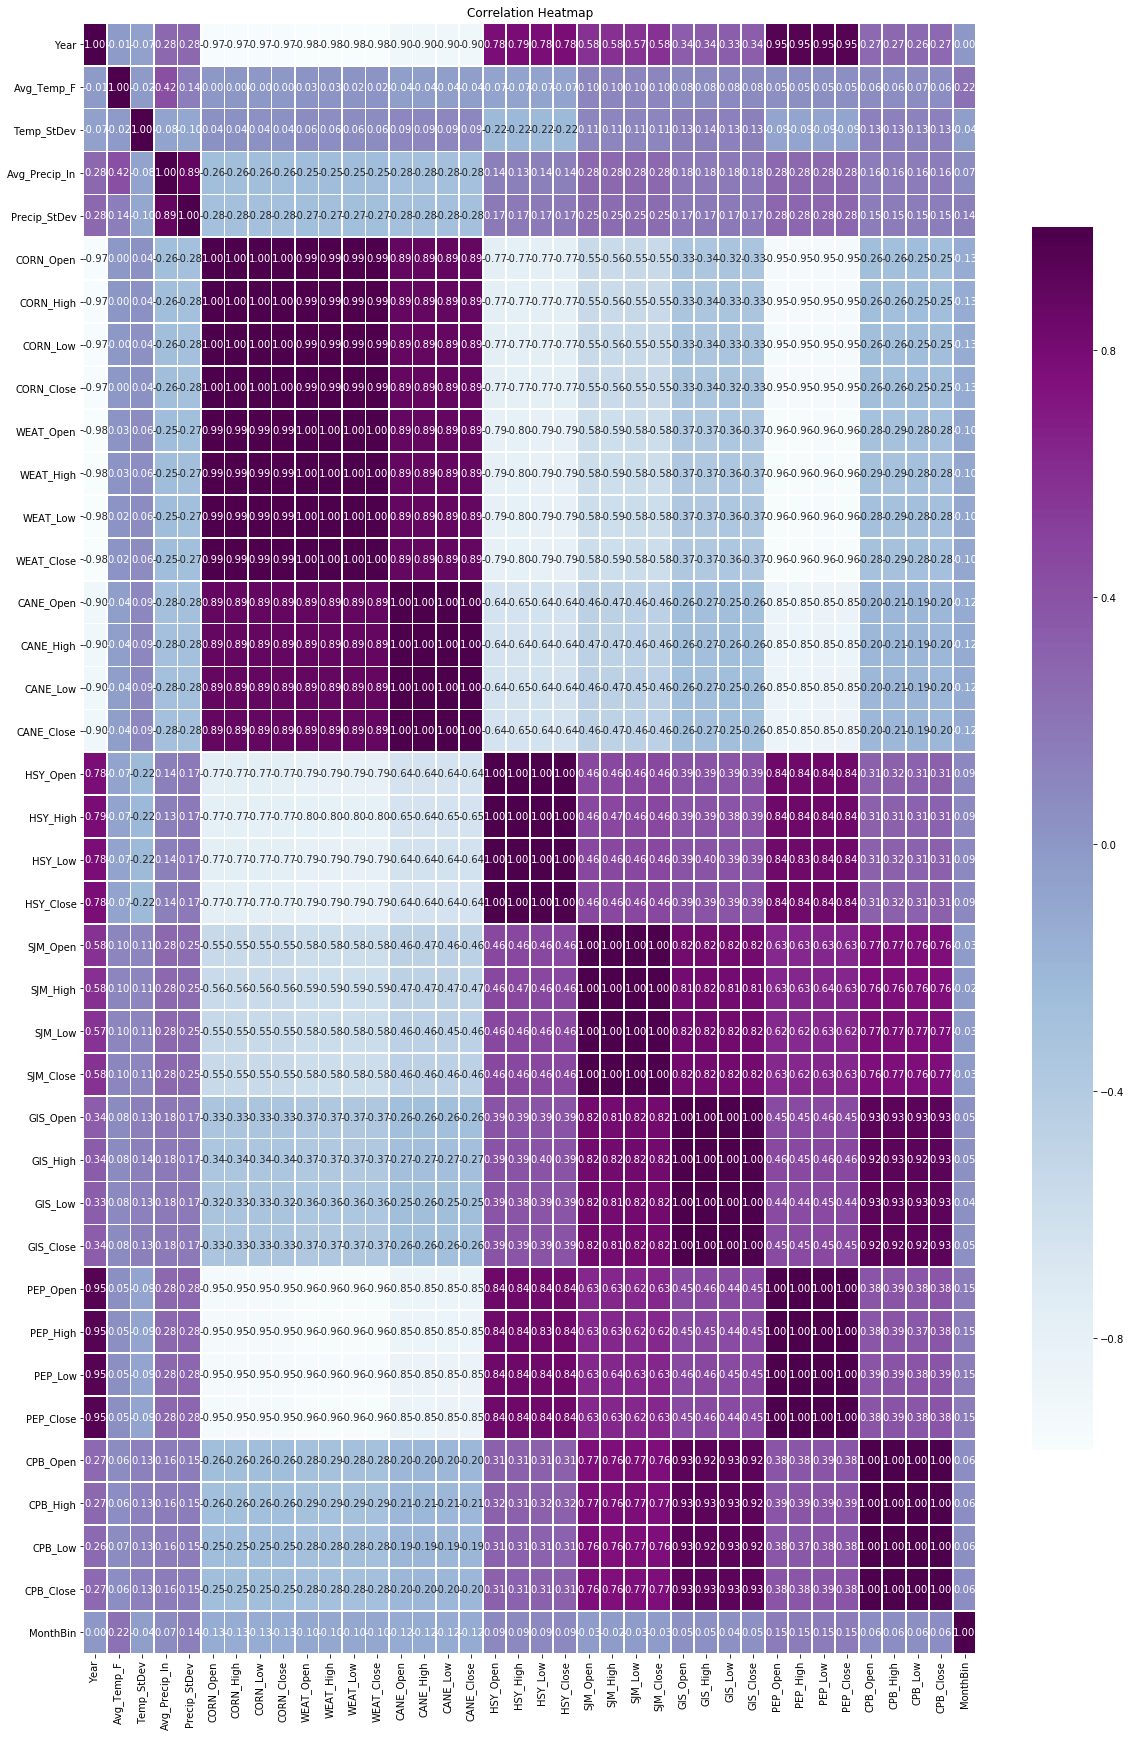

In [13]:
#Created a heatmap to see the correlation between the different variables
#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,30))

#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(data.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})

#Created a title
plt.title('Correlation Heatmap')
plt.savefig('corr_raw.png')

### Initial Findings

- slight correlation with climate and company stock: 
    - avg percip + SJM, avg precip (0.28)
    - avg percip + PEP (0.28)
   
- slight correlation with climate and comodity stock: 
    - avg precip + CORN, WEAT, CANE (0.26, 0.25, 0.28)
    
- strong correlation with all comodity stock (CORN, WEAT, CANE) and company stock:
    - PEP (0.95, 0.95, 0.85) 
    - HSY (0.77, 0.79, 0.64)
    - SJM (0.56, 0.59, 0.47)

In [9]:
#encode Month for binning
def division_func_month(div) :
    if div == 'January':
        return 1
    elif div == 'February':
        return 2
    elif div == 'March':
        return 3
    elif div == 'April':
        return 4
    elif div == 'May':
        return 5
    elif div == 'June':
        return 6
    elif div == 'July':
        return 7
    elif div == 'August':
        return 8
    elif div == 'September':
        return 9
    elif div == 'October':
        return 10
    elif div == 'November':
        return 11
    elif div == 'December':
        return 12
    else:
        return 0

# create a new column with binned results for Month
data['MonthBin'] = data['Month']

#apply binnign to column
data['MonthBin'] = data['MonthBin'].apply(division_func_month)

In [10]:
#encode Month for binning
def division_func_month(div) :
    if div == 'January':
        return 1
    elif div == 'February':
        return 2
    elif div == 'March':
        return 3
    elif div == 'April':
        return 4
    elif div == 'May':
        return 5
    elif div == 'June':
        return 6
    elif div == 'July':
        return 7
    elif div == 'August':
        return 8
    elif div == 'September':
        return 9
    elif div == 'October':
        return 10
    elif div == 'November':
        return 11
    elif div == 'December':
        return 12
    else:
        return 0

# create a new column with binned results for Month
data['MonthBin'] = data['Month']

#apply binnign to column
data['MonthBin'] = data['MonthBin'].apply(division_func_month)